In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [16]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

[[42 29  6 19 28 17  2 43  3 21 31  4]
 [32  0 23  5 48 34 37 26 41 33 24 10]]
[12  7 45 30 27 39 36  8  9 16 38 47]


array([[42, 29,  6, 19, 28, 17,  2, 43,  3, 21, 31,  4],
       [32,  0, 23,  5, 48, 34, 37, 26, 41, 33, 24, 10],
       [12,  7, 45, 30, 27, 39, 36,  8,  9, 16, 38, 47]])

In [71]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    x_te = x[k_indices[k]]
    y_te = y[k_indices[k]]
    y_te = y_te.reshape([len(y_te), 1])
    
    x_tr = x[np.delete(k_indices, (k), axis=0).flatten()]
    y_tr = y[np.delete(k_indices, (k), axis=0).flatten()]
    y_tr = y_tr.reshape([len(y_tr), 1])
    
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    mse, weights = ridge_regression(y_tr, tx_tr, lambda_)
    
    loss_tr = compute_mse(y_tr, tx_tr, weights)[0, 0]
    loss_te = compute_mse(y_te, tx_te, weights)[0, 0]
    
    return loss_tr, loss_te

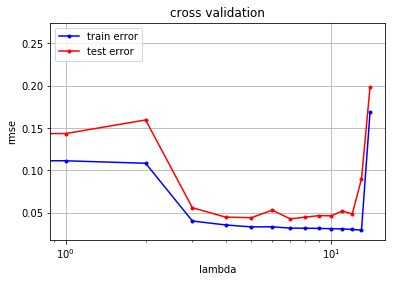

In [88]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambda_ = 0.01
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
#     for ind, lambda_ in enumerate(lambdas):
    for degree_ in range(15):
        
        sum_loss_tr = 0
        sum_loss_te = 0
        for k in range(k_fold): 
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree_)
            
            sum_loss_tr += loss_tr ** 2
            sum_loss_te += loss_te ** 2
        rmse_tr.append(np.sqrt(sum_loss_tr / k_fold))
        rmse_te.append(np.sqrt(sum_loss_te / k_fold))
    
#     cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    cross_validation_visualization(range(15), rmse_tr, rmse_te)
    
    
cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

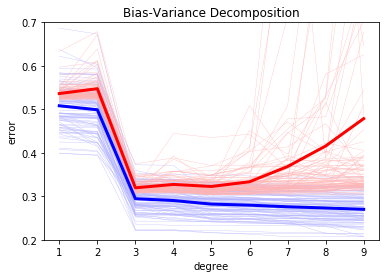

In [87]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from build_polynomial import build_poly

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            weights = least_squares(y_tr, tx_tr)

            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()